## Name: Sanchit Kripalani <br> Batch: M1 <br> Roll No: 31145

### Mini Project 

**Problem statement**

To classify tweets into positive and negative 

In [2]:
# Import necessary libraries
import re 
import nltk 
import string

import numpy as np
import pandas as pd

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read the training and testing data separately
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# Use the .head() function to print the first 5 entries in the dataset
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
# Print the columns and their types 
print(train.dtypes)

id        int64
label     int64
tweet    object
dtype: object


In [7]:
# Print the information about the training and testing data
print('The shape of the training data is: ', train.shape)
print('The shape of the testing data is: ', test.shape)

The shape of the training data is:  (31962, 3)
The shape of the testing data is:  (17197, 2)


In [8]:
# Print the tweets which are labelled as 0
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
# Print the tweets which are labelled as 1
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [10]:
# Print the number of tweets labelled as 0 and 1 respectively
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

**Observations**

- Thus we have to find out the value of label in testing data
- Label 0 are the tweets which are non-racist 
- Label 1 are the tweets which are racist.
- The number of non-racist data samples are substaintially more than the racist ones, which should obviously be the case IRL.

### Visualization

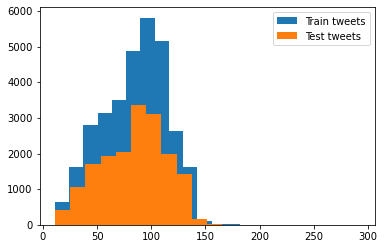

In [11]:
# Plotting a histogram to see the distribution of tweet length.
length_train_dataset = train['tweet'].str.len()
length_test_dataset = test['tweet'].str.len()

plt.hist(length_train_dataset, bins=20, label="Train tweets")
plt.hist(length_test_dataset, bins=20, label="Test tweets")

plt.legend() 
plt.show()

In [12]:
# Combine train and test data in order to perform text preprocessing
combine = train.append(test, ignore_index=True)

In [13]:
# Print the shape of the combined data
print('The shape of combined data is: ', combine.shape)

The shape of combined data is:  (49159, 3)


### Removing twitter handles 

In [14]:
# Define a function to remove a patter from the tweet
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [16]:
# This will remove all the words with hashtag in front
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*") 
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
# This will remove everything and only leave alphabetical characters 
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head()

<ipython-input-17-5aeea82e371c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## Removing certain words

In [18]:
# Short words may not play an important role in classification
# So we can remove them and see how it affects the model
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [19]:
# Print the tweets
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [20]:
# This step is basically done to split tweets to individual tweets
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [21]:
# Performing stemming in order to get the root/stem words
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [22]:
# After stemming is done, we have to combine the words in order to get the sentence back
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine['tidy_tweet'] = tokenized_tweet

In [23]:
# Word Cloud is an excellent way to express word summary of a text
from wordcloud import WordCloud

# Find all the words in the corpus
all_words = ' '.join([text for text in combine['tidy_tweet']]) 

# Generate the word count for all words in the corpus
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## Data Segregation

In [24]:
# Find the words which appear in non-racist tweets
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])

wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [25]:
# Similarly, find the words which appear in racist tweets

negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

## Role of Tweet Type (Hashtags)

In [26]:
# Function to collect hashtags in a tweet
def hashtag_extract(x):
    hashtags=[]
    # For all the words in a tweet
    for i in x: 
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [32]:
# Segregate hashtags used in racist and non-racist tweets

# Non-racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])

# Racist tweets
ht_negative = hashtag_extract(combine['tidy_tweet'][combine['label']==1])

# The following step will combine all the hashtags from all tweets
ht_regular = sum(ht_regular, [])
ht_negative = sum(ht_negative, [])

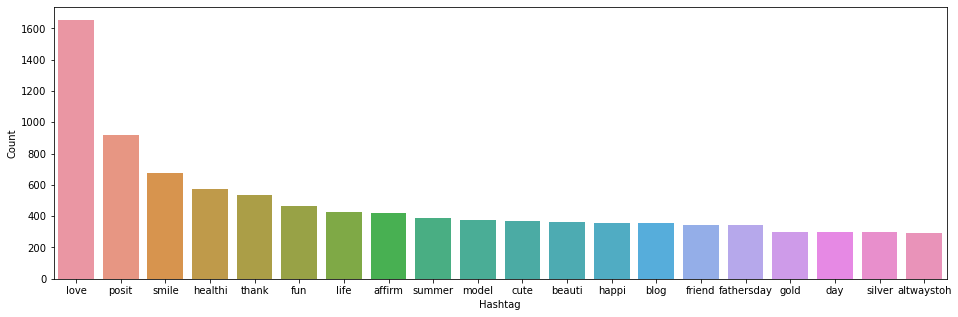

In [33]:
# Non-racist tweets

# Plotting the frequency distribution of hashtags used in non racist tweets
nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

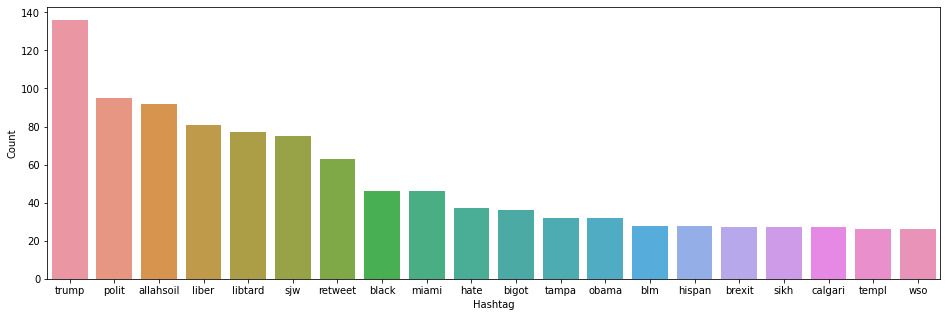

In [34]:
# Similarly, for racist tweets

racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

## Converting text to features

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

C:\Users\Sanchit\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [36]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(49159, 1000)

In [ ]:
#TF-IDF

#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.

#TF-IDF = TF * IDF

#tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000,stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
#tfidf.shape

In [37]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)

In [38]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)


## Multinomial Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

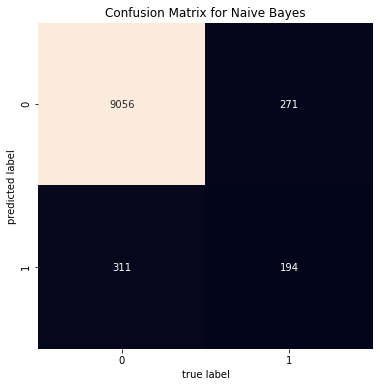

In [43]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,6))
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


In [41]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9408055329536208
